In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time
%matplotlib inline
from imutils.video import count_frames
from scipy.spatial import distance as dist

In [26]:
import pandas as pd

In [27]:
#%matplotlib notebook

 # Video i/p 

In [28]:
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/Export_2019-12-18_181852/0 - 2019-12-18 17-56-37-496.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/New Slab/Export_2019-12-19_124059/0 - 2019-12-19 07-01-00-394.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/tata steel/day-4 data/0 - 2019-12-19 19-35-05-273.mov")

cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/tata steel/data from tata -14/0 - 2020-02-09 10-35-00-836.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Downloads/VID-20200106-WA0003.mp4")

#cap = cv2.VideoCapture("C:/Users/shrin/Desktop/openpose-master/openpose-master/build/examples/tutorial_api_python/abhilash.mov")
totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
totalFrames

2976.0

In [29]:
cap.set(cv2.CAP_PROP_POS_FRAMES,800)

True

In [36]:
%matplotlib notebook

In [37]:
bg = cv2.imread("4mp_v1.jpg",0)

(1520, 2592, 3)
(1520, 2592, 3)


<IPython.core.display.Javascript object>


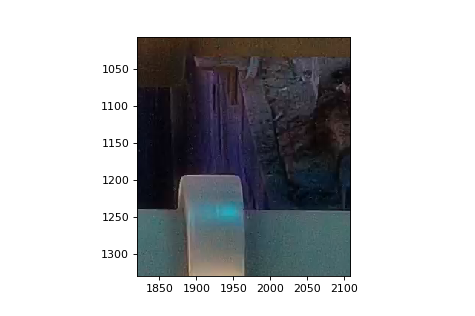

In [38]:
ret, frame = cap.read()
#imgIP = "refImage.jpg"
#frame = cv2.imread(imgIP)
#frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
#test = frame.copy()
print(frame.shape)
#plt.figure(figsize=(10,12))
#resized = cv2.resize(frame,(frame.shape[1]*2,frame.shape[0]*2), interpolation=cv2.INTER_LINEAR)
#print(frame.shape)
#frame = cv2.resize(frame,(frame.shape[1]*2,frame.shape[0]*2), cv2.INTER_AREA)
print(frame.shape)
plt.imshow(frame)

In [33]:
#cv2.imwrite("4mp_v1.jpg",frame)

In [34]:
#frame[:,2122:] = 0 
frame[:,1850:] = 0

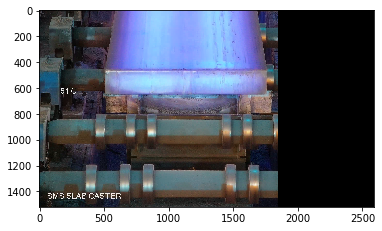

In [35]:
plt.imshow(frame)

In [12]:
[358,1200,1958,1200]

[308,888,1455,888]
#%matplotlib notebook

[308, 888, 1455, 888]

In [13]:
#cv2.imwrite("toTatat1.jpg",frame)

In [14]:
%matplotlib notebook

# pixels Per Metric

In [15]:
#alar = [682,708,1095,685]
#alar = [510-9,800,1126-9,800]
#alar = [308,651,1203,651]
#alar = [257,647,1390,647]
#alar = [162,647,1548,647]
#alar = [325,1259,3111,1259] # 2x
#alar = [176,771,1330,771]
#alar = [313,888,1455 - 20,888]

#alar = [313,888-100,1455 - 20,888-100]



alar = [358,1200 - 150 +20 ,1958,1200 - 150 +20  ] # 4mp

In [16]:
#drawLine = frame.copy()

dB = dist.euclidean(alar[:2],alar[-2:])
pixelsPerMetric = dB / 1690
print(1/pixelsPerMetric,"<<<<<-----------------MM per Pix")


1.0562500000000001 <<<<<-----------------MM per Pix


(1520, 2592)
(1520, 2592) <- - dst


<IPython.core.display.Javascript object>


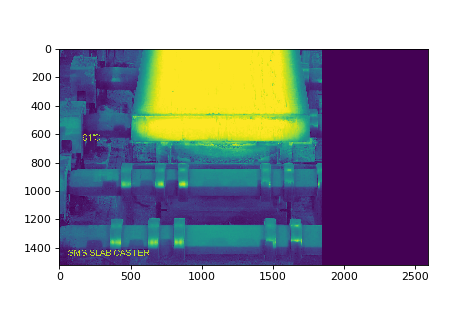

In [23]:
img = cv2.cvtColor(frame.copy(),cv2.COLOR_BGR2RGB)
r,g,b = cv2.split(img.copy()) 
hsv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HSV)
hh,s,v = cv2.split(hsv)
yuv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2YUV)
y,u,vb = cv2.split(yuv)


hls = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HLS)
h,l,ss = cv2.split(hls)

#randv = np.dstack((r,v),)
randv = cv2.addWeighted(y, -1.56, r, 2.8, 0.0)
print(randv.shape)

dst = cv2.addWeighted(y, 0, randv, 1.3, 0.0)
dst = cv2.line(dst,(alar[0],alar[1]),(alar[2],alar[3]),255,13)
#dst = cv2.addWeighted(v, .02, r, 1.6, 0.0)
print(dst.shape,"<- - dst")
plt.imshow(r)

In [18]:
%matplotlib notebook

In [19]:
print(time.localtime(0))

time.struct_time(tm_year=1970, tm_mon=1, tm_mday=1, tm_hour=5, tm_min=30, tm_sec=0, tm_wday=3, tm_yday=1, tm_isdst=0)


In [20]:
import csv

In [21]:
leftCor = []
rightCor = []
save = []
while(True):
    ret, img = cap.read()
    
    #img = cv2.resize(img,(img.shape[1] ,img.shape[0] ), cv2.INTER_AREA)
    
     
    
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # BG SUB
    bgsub = cv2.absdiff(gray,bg)
    
    b,g,r = cv2.split(img.copy()) 
    #hsv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HSV)
    #h,s,v = cv2.split(hsv)
    yuv = cv2.cvtColor(img.copy(),cv2.COLOR_BGR2YUV)
    y,u,vb = cv2.split(yuv)
    
    randv = cv2.addWeighted(y, .5, b, 2., 0.0)  #good 220
    #print(randv.shape)
    
    #randv = cv2.addWeighted(y, -1.56 , r, 2.9, 0.0)
    dst = cv2.addWeighted(y, 0, randv, 1.3, 0.0)
    #dst = cv2.addWeighted(v, .02, r, 1.251, 0.0) # threh 190
    
    blur = cv2.GaussianBlur(dst,(3,3),0)
    
    _,thresh = cv2.threshold(blur,220,255,cv2.THRESH_BINARY )
    thresh[:,2122:] = 0
    #thresh[:,1850:] = 0
    thresh[:,:200] = 0
    
    
    val = alar[1]
    
    
    #img = cv2.line(img ,(alar[0],alar[1]),(alar[2],alar[3]),(255,5,0),3)
    if np.count_nonzero(thresh[val,]) >= 500:
        leftSide = np.nonzero(thresh[val,])[0][0] 
        rightSide = np.nonzero(thresh[val,])[0][-1] 
        leftCor.append(leftSide)
        rightCor.append(rightSide)
        #print(np.count_nonzero(thresh[816,]))
        mmPpix = ((1/pixelsPerMetric)* (rightSide - leftSide)) 
        print(mmPpix,",_______________________________")
        print("leftSide = ",leftSide,"rightSide = ", rightSide)
        print(blur[val,][leftSide :rightSide ])
        
        img  = cv2.line(img ,(np.nonzero(thresh[val,])[0][0] ,alar[1]),((np.nonzero(thresh[val,])[0][-1]) ,alar[3]),(255),2)
        
        #img = cv2.line(img ,(alar[0],alar[1]),(alar[2],alar[3]),(255,5,0),3)
        
        img = cv2.circle(img,(leftSide,alar[1]) , 1, 0, 5)
        img = cv2.circle(img,(rightSide,alar[3]) , 1, 0, 5)
        
        font = cv2.FONT_HERSHEY_SIMPLEX
        img = cv2.putText(img,"{} mm".format(mmPpix),(0,330), font, 1.2 , (200,255,155), 2 , cv2.LINE_AA)
        mmPpix_time = pd.DataFrame([[int(mmPpix),time.asctime( time.localtime(time.time()))]])
        
        mmPpix_time.to_csv('testData.csv', mode='a+', header=False,index=False)
        '''with open('testData.csv', 'a+', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(mmPpix_time)'''
        
    
    #img1 = cv2.resize(img ,(int(1920),int(1080)))
    #img2 = cv2.resize(dstCnt,(500,300))
    #img3 = cv2.resize(thresh,(500,300))
    #save.append(img1)
    #img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    img1 = cv2.resize(img ,(int(1920/2),int(1080/2)))
    thresh1 = cv2.resize(thresh ,(int(1920/2),int(1080/2)))
    bgsub1 = cv2.resize(bgsub ,(int(1920/2),int(1080/2)))
    cv2.imshow('thresh',thresh1)
    cv2.imshow('imgzzz ',img1)
    cv2.imshow('bgsub',bgsub1)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

1719.5750000000003 ,_______________________________
leftSide =  436 rightSide =  2064
[239 253 254 ... 240 244 252]
1721.6875000000002 ,_______________________________
leftSide =  434 rightSide =  2064
[231 255 255 ... 240 244 252]
1720.6312500000001 ,_______________________________
leftSide =  434 rightSide =  2063
[251 255 255 ... 246 239 242]
1721.6875000000002 ,_______________________________
leftSide =  433 rightSide =  2063
[222 252 255 ... 246 238 240]
1722.7437500000003 ,_______________________________
leftSide =  433 rightSide =  2064
[238 255 255 ... 238 240 249]
1725.9125000000001 ,_______________________________
leftSide =  430 rightSide =  2064
[225 250 255 ... 238 240 249]
1726.9687500000002 ,_______________________________
leftSide =  429 rightSide =  2064
[238 255 255 ... 238 240 249]
1728.0250000000003 ,_______________________________
leftSide =  428 rightSide =  2064
[228 251 255 ... 238 240 249]
1729.0812500000002 ,_______________________________
leftSide =  427 righ

1549.5187500000002 ,_______________________________
leftSide =  401 rightSide =  1868
[238 252 255 ... 255 255 255]
1550.5750000000003 ,_______________________________
leftSide =  400 rightSide =  1868
[227 246 254 ... 255 255 255]
1550.5750000000003 ,_______________________________
leftSide =  400 rightSide =  1868
[227 246 254 ... 255 255 255]
1551.6312500000001 ,_______________________________
leftSide =  400 rightSide =  1869
[227 246 254 ... 255 255 255]
1551.6312500000001 ,_______________________________
leftSide =  400 rightSide =  1869
[227 243 253 ... 255 252 248]
1551.6312500000001 ,_______________________________
leftSide =  400 rightSide =  1869
[224 243 253 ... 255 254 254]
1551.6312500000001 ,_______________________________
leftSide =  400 rightSide =  1869
[221 243 253 ... 248 250 253]
1550.5750000000003 ,_______________________________
leftSide =  400 rightSide =  1868
[225 243 253 ... 249 244 249]
1550.5750000000003 ,_______________________________
leftSide =  400 righ

1549.5187500000002 ,_______________________________
leftSide =  403 rightSide =  1870
[245 255 255 ... 229 225 242]
1549.5187500000002 ,_______________________________
leftSide =  403 rightSide =  1870
[245 255 255 ... 226 220 241]
1549.5187500000002 ,_______________________________
leftSide =  403 rightSide =  1870
[245 255 255 ... 224 221 242]
1549.5187500000002 ,_______________________________
leftSide =  403 rightSide =  1870
[245 255 255 ... 228 229 245]
1549.5187500000002 ,_______________________________
leftSide =  403 rightSide =  1870
[245 255 255 ... 242 231 232]
1549.5187500000002 ,_______________________________
leftSide =  403 rightSide =  1870
[245 255 255 ... 245 240 246]
1550.5750000000003 ,_______________________________
leftSide =  402 rightSide =  1870
[227 251 255 ... 251 246 251]
1550.5750000000003 ,_______________________________
leftSide =  402 rightSide =  1870
[227 251 255 ... 251 246 251]
1550.5750000000003 ,_______________________________
leftSide =  402 righ

1549.5187500000002 ,_______________________________
leftSide =  403 rightSide =  1870
[238 252 255 ... 243 243 246]
1549.5187500000002 ,_______________________________
leftSide =  403 rightSide =  1870
[228 248 255 ... 243 242 242]
1549.5187500000002 ,_______________________________
leftSide =  403 rightSide =  1870
[228 248 255 ... 243 242 242]
1548.4625 ,_______________________________
leftSide =  404 rightSide =  1870
[243 255 255 ... 243 242 242]
1549.5187500000002 ,_______________________________
leftSide =  403 rightSide =  1870
[225 246 255 ... 243 242 242]
1549.5187500000002 ,_______________________________
leftSide =  403 rightSide =  1870
[225 246 255 ... 243 242 242]
1548.4625 ,_______________________________
leftSide =  404 rightSide =  1870
[244 255 255 ... 249 235 233]
1548.4625 ,_______________________________
leftSide =  404 rightSide =  1870
[244 255 255 ... 249 235 233]
1549.5187500000002 ,_______________________________
leftSide =  404 rightSide =  1871
[244 255 255 

1549.5187500000002 ,_______________________________
leftSide =  404 rightSide =  1871
[240 255 255 ... 214 210 226]
1549.5187500000002 ,_______________________________
leftSide =  404 rightSide =  1871
[240 255 255 ... 215 211 226]
1549.5187500000002 ,_______________________________
leftSide =  404 rightSide =  1871
[242 255 255 ... 214 210 226]
1549.5187500000002 ,_______________________________
leftSide =  404 rightSide =  1871
[242 255 255 ... 214 210 226]
1549.5187500000002 ,_______________________________
leftSide =  404 rightSide =  1871
[242 255 255 ... 213 204 218]
1549.5187500000002 ,_______________________________
leftSide =  404 rightSide =  1871
[242 255 255 ... 213 204 218]
1549.5187500000002 ,_______________________________
leftSide =  404 rightSide =  1871
[242 255 255 ... 214 204 218]
1549.5187500000002 ,_______________________________
leftSide =  404 rightSide =  1871
[242 255 255 ... 214 204 218]
1549.5187500000002 ,_______________________________
leftSide =  404 righ

1549.5187500000002 ,_______________________________
leftSide =  405 rightSide =  1872
[238 251 255 ... 219 226 237]
1549.5187500000002 ,_______________________________
leftSide =  405 rightSide =  1872
[238 251 255 ... 216 220 232]
1549.5187500000002 ,_______________________________
leftSide =  405 rightSide =  1872
[234 249 255 ... 225 215 221]
1549.5187500000002 ,_______________________________
leftSide =  405 rightSide =  1872
[234 249 255 ... 227 213 219]
1549.5187500000002 ,_______________________________
leftSide =  405 rightSide =  1872
[234 249 255 ... 227 213 219]
1550.5750000000003 ,_______________________________
leftSide =  405 rightSide =  1873
[234 250 255 ... 213 218 238]
1550.5750000000003 ,_______________________________
leftSide =  405 rightSide =  1873
[237 250 255 ... 213 216 235]
1550.5750000000003 ,_______________________________
leftSide =  405 rightSide =  1873
[237 250 255 ... 216 217 234]
1550.5750000000003 ,_______________________________
leftSide =  405 righ

1555.8562500000003 ,_______________________________
leftSide =  400 rightSide =  1873
[235 254 255 ... 255 255 255]
1555.8562500000003 ,_______________________________
leftSide =  400 rightSide =  1873
[235 254 255 ... 255 255 255]
1554.8000000000002 ,_______________________________
leftSide =  401 rightSide =  1873
[243 255 255 ... 255 251 246]
1554.8000000000002 ,_______________________________
leftSide =  401 rightSide =  1873
[243 255 255 ... 255 253 250]
1554.8000000000002 ,_______________________________
leftSide =  401 rightSide =  1873
[243 255 255 ... 252 250 250]
1554.8000000000002 ,_______________________________
leftSide =  401 rightSide =  1873
[237 255 255 ... 252 250 250]
1554.8000000000002 ,_______________________________
leftSide =  401 rightSide =  1873
[233 255 255 ... 238 234 238]
1554.8000000000002 ,_______________________________
leftSide =  401 rightSide =  1873
[233 255 255 ... 238 234 238]
1554.8000000000002 ,_______________________________
leftSide =  401 righ

In [22]:
break

SyntaxError: 'break' outside loop (<ipython-input-22-6aaf1f276005>, line 4)

In [ ]:
cv2.__version__

In [ ]:
import scipy


In [ ]:
mmPpix_time

In [ ]:
scipy.__version__

In [ ]:
print(len(np.nonzero(thresh[val,])[0]))

In [ ]:
a = pd.DataFrame(np.nonzero(thresh[val,])[0])

In [ ]:
time.today()

In [ ]:
from datetime import date
date.ctime()

In [ ]:
x = time.asctime( time.localtime(time.time()) )

In [ ]:
time.asctime( time.localtime(time.time()) ) 

In [ ]:
int(mmPpix)

In [ ]:
int(x[-13:-11])

In [ ]:
x[-10:-8]